In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import pandas as pd

import vendee_globe as vg

In [12]:
# load and prep race data 
df_race = pd.read_parquet("race_2020.parquet")
df_race["skipper"] = df_race["skipper"].replace('Arnaud Boissieres', 'Arnaud Boissières').replace('Sam Davies', 'Samantha Davies')
df_race.shape

(15277, 24)

In [30]:
# load and prep web data
if os.path.exists("web_2020.parquet"):
    df_web = pd.read_parquet("web_2020.parquet")
else:
    df_web = vg.load_web_data_2020()
    df_web.to_parquet("web_2020.parquet")

df_web = vg.data_prep_web(df_web)
df_web.shape

(33, 17)

In [32]:
# merge all 3 dataframes
df = pd.merge(df_race, df_web, on="skipper", how="left")
df.shape

(15277, 40)

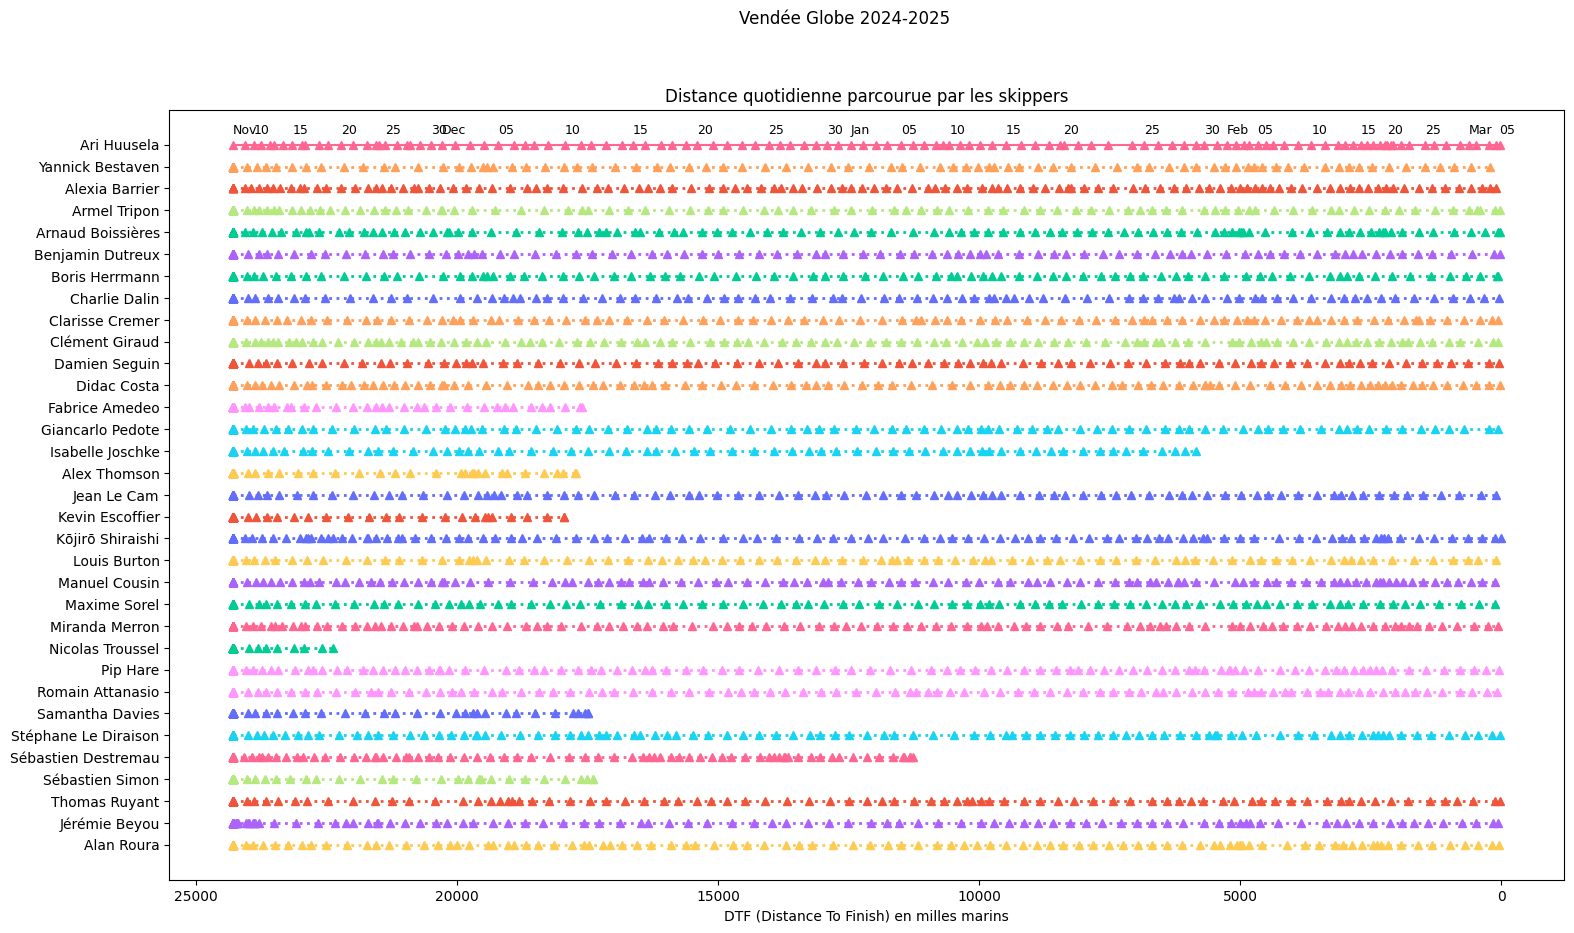

In [22]:
vg.show_race(df_race)

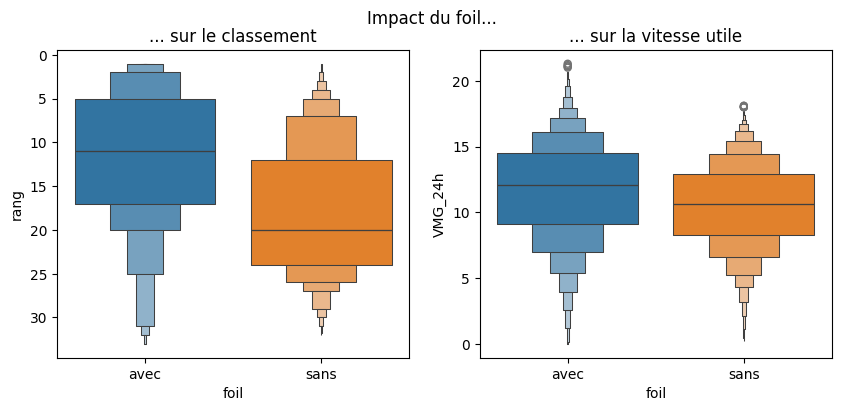

In [23]:
vg.impact_foil(df)

In [33]:
vg.interact(df)

interactive(children=(Dropdown(description='Colonne :', index=13, options=('rang', 'latitude', 'longitude', 'c…

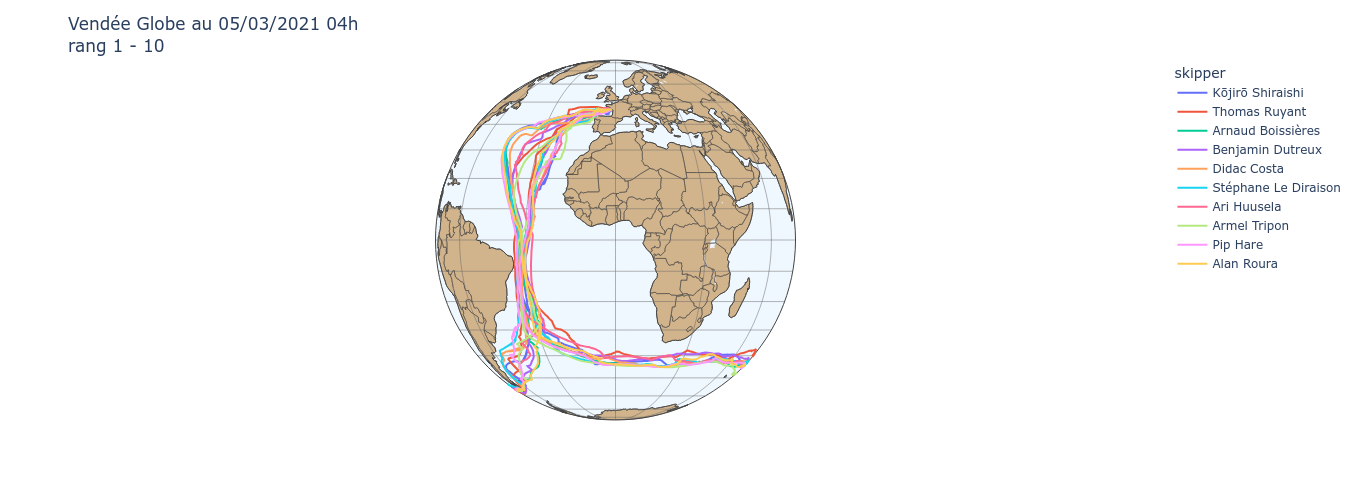

In [25]:
vg.show_globe(df_race, 0, 10)

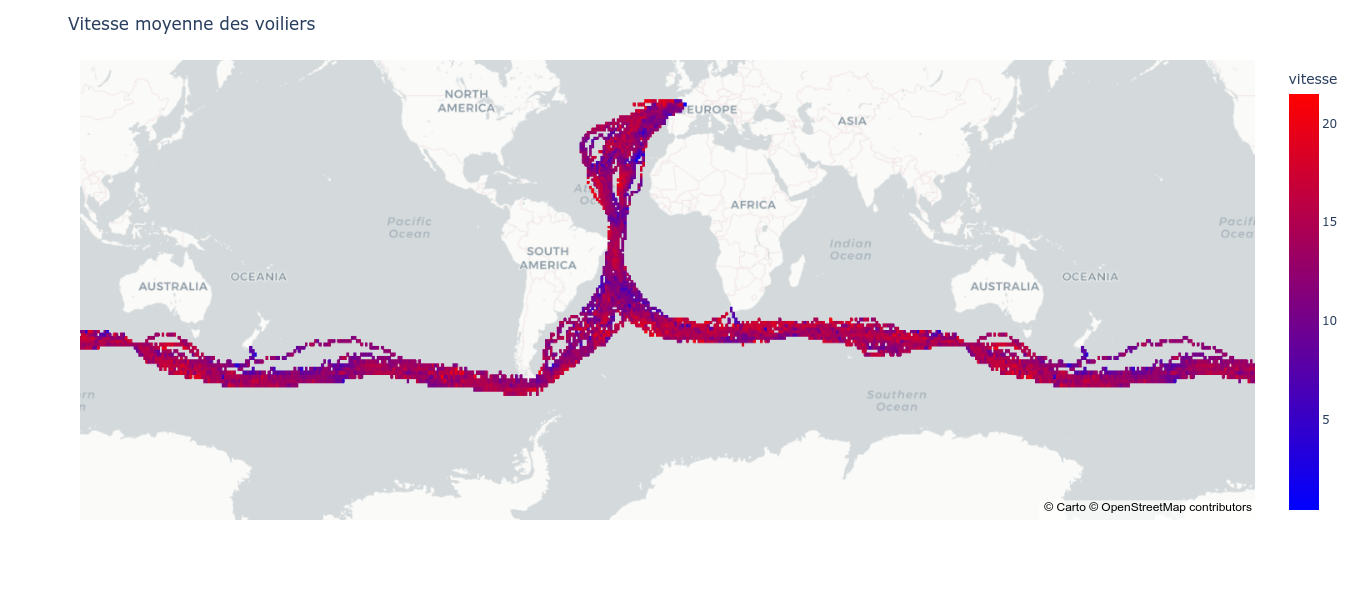

In [26]:
vg.show_speed(df_race)

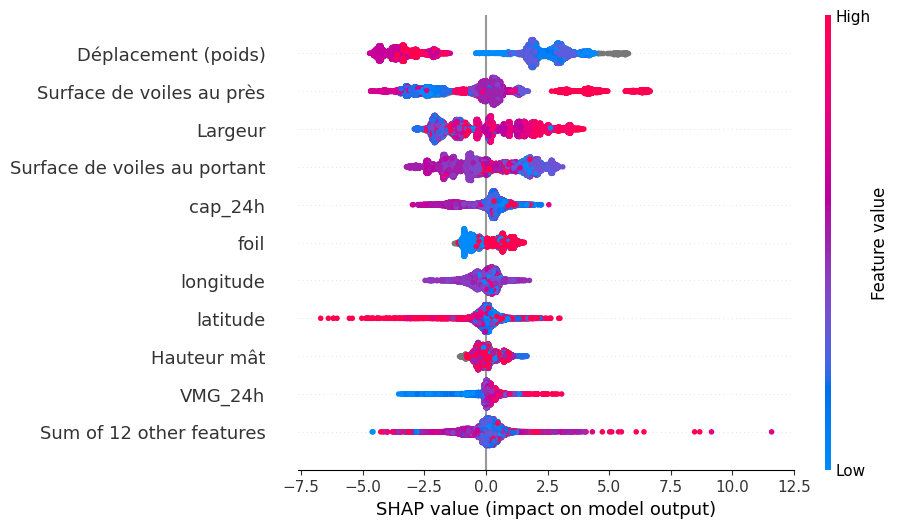

In [34]:
vg.show_shap_values(df)